# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [Fadhlur rohman]
- **Email:** [fadhlurrohman1204@gmail.com]
- **ID Dicoding:** [Fadhlur Rohman]

## Menentukan Pertanyaan Bisnis

- Pada bulan berapa tingkat polusi udara tertinggi dan terendah dalam 5 tahun terakhir di setiap kota?
- Apakah ada tren musiman dalam tingkat polutan(PM2.5) udara di setiap kota?

## Import Semua Packages/Library yang Digunakan

In [1]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency
sns.set(style='dark')

## Data Wrangling

### Gathering Data

#### membaca semua data csv

In [3]:
df_Shunyi = pd.read_csv("PRSA_Data_Shunyi_20130301-20170228.csv", delimiter=",")

In [4]:
df_Tiantan = pd.read_csv("PRSA_Data_Tiantan_20130301-20170228.csv", delimiter=",")

In [5]:
df_Wanliu= pd.read_csv("PRSA_Data_Wanliu_20130301-20170228.csv", delimiter=",")

**Insight:**
- How to read data csv

### Assessing Data

#### Membaca info dataframe

In [6]:
df_Shunyi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [7]:
df_Tiantan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [8]:
df_Wanliu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Melihat jumlah duplikasi pada dataframe Shunyi

In [9]:
print("Jumlah duplikasi: ", df_Shunyi.duplicated().sum())

Jumlah duplikasi:  0


Melihat jumlah duplikasi pada dataframe Tiantan

In [10]:
print("Jumlah duplikasi: ", df_Tiantan.duplicated().sum())

Jumlah duplikasi:  0


Melihat jumlah duplikasi pada dataframe Wanliu

In [11]:
print("Jumlah duplikasi: ", df_Wanliu.duplicated().sum())

Jumlah duplikasi:  0


Melihat jumlah nilai NaN pada dataframe Shunyi

In [12]:
df_Shunyi.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,913
PM10,548
SO2,1296
NO2,1365
CO,2178


Melihat jumlah nilai NaN pada dataframe Tiantan

In [13]:
df_Tiantan.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,677
PM10,597
SO2,1118
NO2,744
CO,1126


Melihat jumlah nilai NaN pada dataframe Wanliu

In [15]:
df_Wanliu.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,382
PM10,284
SO2,575
NO2,1070
CO,1812


Melihat deskripsi dataframe Shunyi

In [ ]:
print(df_Shunyi.describe(include="all"))

                  No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

               PM2.5          PM10     

Melihat deskripsi dataframe Tiantan

In [ ]:
print(df_Tiantan.describe(include="all"))

                  No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

               PM2.5          PM10     

Melihat deskripsi dataframe Wanliu

In [ ]:
print(df_Wanliu.describe(include="all"))

                  No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

               PM2.5          PM10     

**Insight:**
- di setiap dataframe tidak memiliki duplikasi data

### Cleaning Data

Mengisi nilai yang NaN dengan nilai mean pada dataframe Shunyi

In [14]:
df_Shunyi_fill = df_Shunyi.fillna(df_Shunyi.mean(numeric_only=True))

Mengisi nilai yang NaN dengan nilai mean pada dataframe Tiantan

In [ ]:
df_Tiantan_fill = df_Tiantan.fillna(df_Tiantan.mean(numeric_only=True))

Mengisi nilai yang NaN dengan nilai mean pada dataframe Wanliu

In [ ]:
df_Wanliu_fill = df_Wanliu.fillna(df_Wanliu.mean(numeric_only=True))

Mengecek missing value tadi yang sudah di isi dengan nilai mean pada dataframe Shunyi

In [ ]:
df_Shunyi_fill.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


Mengecek missing value tadi yang sudah di isi dengan nilai mean pada dataframe Tiantan

In [ ]:
df_Tiantan_fill.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


Mengecek missing value tadi yang sudah di isi dengan nilai mean pada dataframe Wanliu

In [ ]:
df_Wanliu_fill.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


Melakukan drop pada missing value yang tersisa pada dataframe Shunyi

In [ ]:
dfShunyi = df_Shunyi_fill.dropna()

Melakukan drop pada missing value yang tersisa pada dataframe Tiantan

In [ ]:
dfTiantan = df_Tiantan_fill.dropna()

Melakukan drop pada missing value yang tersisa pada dataframe Wanliu

In [ ]:
dfWanliu = df_Wanliu_fill.dropna()

Menambah kolom datetime berdasarkan kolom year,month,day,hour pada dataframe Shunyi

In [ ]:
dfShunyi.loc[:, 'datetime'] = pd.to_datetime(dfShunyi[['year', 'month', 'day', 'hour']])

<ipython-input-27-5ff840793aff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfShunyi.loc[:, 'datetime'] = pd.to_datetime(dfShunyi[['year', 'month', 'day', 'hour']])


Menambah kolom datetime berdasarkan kolom year,month,day,hour pada dataframe Tiantan

In [ ]:
dfTiantan.loc[:, 'datetime'] = pd.to_datetime(dfTiantan[['year', 'month', 'day', 'hour']])

<ipython-input-28-3f82bea8e809>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTiantan.loc[:, 'datetime'] = pd.to_datetime(dfTiantan[['year', 'month', 'day', 'hour']])


Menambah kolom datetime berdasarkan kolom year,month,day,hour pada dataframe Wanliu

In [ ]:
dfWanliu.loc[:, 'datetime'] = pd.to_datetime(dfWanliu[['year', 'month', 'day', 'hour']])

<ipython-input-29-9d5366442a44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfWanliu.loc[:, 'datetime'] = pd.to_datetime(dfWanliu[['year', 'month', 'day', 'hour']])


Melakukan set index pada dataframe Shunyi

In [ ]:
dfShunyi.set_index('datetime', inplace=True)

Melakukan set index pada dataframe Tiantan

In [ ]:
dfTiantan.set_index('datetime', inplace=True)

Melakukan set index pada dataframe Wanliu

In [ ]:
dfWanliu.set_index('datetime', inplace=True)

Melakukan drop pada kolom wd,station pada dataframe Shunyi

In [ ]:
dfShunyi = dfShunyi.drop(columns=['wd','station'])

Melakukan drop pada kolom wd,station pada dataframe Tiantan

In [ ]:
dfTiantan = dfTiantan.drop(columns=['wd','station'])

Melakukan drop pada kolom wd,station pada dataframe Wanliu

In [ ]:
dfWanliu = dfWanliu.drop(columns=['wd','station'])

Melakukan pengecek pada dataframe Shunyi yang sudah dibersihkan

In [ ]:
dfShunyi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34581 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      34581 non-null  int64  
 1   year    34581 non-null  int64  
 2   month   34581 non-null  int64  
 3   day     34581 non-null  int64  
 4   hour    34581 non-null  int64  
 5   PM2.5   34581 non-null  float64
 6   PM10    34581 non-null  float64
 7   SO2     34581 non-null  float64
 8   NO2     34581 non-null  float64
 9   CO      34581 non-null  float64
 10  O3      34581 non-null  float64
 11  TEMP    34581 non-null  float64
 12  PRES    34581 non-null  float64
 13  DEWP    34581 non-null  float64
 14  RAIN    34581 non-null  float64
 15  WSPM    34581 non-null  float64
dtypes: float64(11), int64(5)
memory usage: 4.5 MB


Melakukan pengecek pada dataframe Tiantan yang sudah dibersihkan

In [ ]:
dfTiantan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34986 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      34986 non-null  int64  
 1   year    34986 non-null  int64  
 2   month   34986 non-null  int64  
 3   day     34986 non-null  int64  
 4   hour    34986 non-null  int64  
 5   PM2.5   34986 non-null  float64
 6   PM10    34986 non-null  float64
 7   SO2     34986 non-null  float64
 8   NO2     34986 non-null  float64
 9   CO      34986 non-null  float64
 10  O3      34986 non-null  float64
 11  TEMP    34986 non-null  float64
 12  PRES    34986 non-null  float64
 13  DEWP    34986 non-null  float64
 14  RAIN    34986 non-null  float64
 15  WSPM    34986 non-null  float64
dtypes: float64(11), int64(5)
memory usage: 4.5 MB


Melakukan pengecek pada dataframe Wanliu yang sudah dibersihkan

In [ ]:
dfWanliu.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34941 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      34941 non-null  int64  
 1   year    34941 non-null  int64  
 2   month   34941 non-null  int64  
 3   day     34941 non-null  int64  
 4   hour    34941 non-null  int64  
 5   PM2.5   34941 non-null  float64
 6   PM10    34941 non-null  float64
 7   SO2     34941 non-null  float64
 8   NO2     34941 non-null  float64
 9   CO      34941 non-null  float64
 10  O3      34941 non-null  float64
 11  TEMP    34941 non-null  float64
 12  PRES    34941 non-null  float64
 13  DEWP    34941 non-null  float64
 14  RAIN    34941 non-null  float64
 15  WSPM    34941 non-null  float64
dtypes: float64(11), int64(5)
memory usage: 4.5 MB


**Insight:**
- Mengganti missing value dengan mean() karena adanya outlier di data, sehingga dampaknya terhadap hasil tidak terlalu signifikan.
- Pada kolom wd(wind direction) masih terdapat missing value lalu melakukan cleaning data menggunakan metode drop

## Exploratory Data Analysis (EDA)

### Explore ...

Mendefinisikan fungsi jenis polusi

In [ ]:
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

Membuat UI streamlit dengan inputan user

In [ ]:
# Streamlit UI elements
st.title("Air Quality Analysis by City (2013-2017)")
st.subheader("Choose a year and pollutant to display the monthly air quality levels")

# memasukkan pilihan tahun (2013-2017)
year = st.selectbox("Select the Year", [2013, 2014, 2015, 2016, 2017])

# memasukkan pilihan polusi
pollutant = st.selectbox("Select the Pollutant", pollutants)

# memasukkan pilihan kota
city = st.selectbox("Select the City", ['Shunyi', 'Tiantan', 'Wanliu'])

2024-10-02 04:30:51.299 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-02 04:30:51.567 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-10-02 04:30:51.570 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-02 04:30:51.572 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-02 04:30:51.574 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-02 04:30:51.576 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-02 04:30:51.578 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-02 04:30:51.580 Thread 'MainThread': mi

Membuat fungsi filter untuk mencari data berdasarkan tahun dan jenis polusi

In [ ]:
# membuat fungsi filter
def filter_by_year_and_pollutant(df, year, pollutant):
        df_filtered = df[df.index.year == year]
        monthly_pollution = df_filtered.resample('M').mean()[pollutant]
        monthly_pollution.index = monthly_pollution.index.strftime('%B')  # Mengkoversi index bulan ke string nama bulan
        return monthly_pollution

Membuat kondisi sesuai filter data yang di inputkan user

In [ ]:
# Filtering data
if city == 'Shunyi':
    monthly_pollution = filter_by_year_and_pollutant(dfShunyi, year, pollutant)
elif city == 'Tiantan':
    monthly_pollution = filter_by_year_and_pollutant(dfTiantan, year, pollutant)
else:
    monthly_pollution = filter_by_year_and_pollutant(dfWanliu, year, pollutant)

# Plotting
st.subheader(f"Monthly {pollutant} Pollution Levels in {city} for {year}")

<ipython-input-41-5520e7df88bc>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_pollution = df_filtered.resample('M').mean()[pollutant]
2024-10-02 04:30:51.667 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-02 04:30:51.670 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

Mengindentifikasi peak dan lowest data

In [ ]:
peak_month = monthly_pollution.idxmax()
lowest_month = monthly_pollution.idxmin()
peak_value = monthly_pollution.max()
lowest_value = monthly_pollution.min()

Mendefinisikan Fungsi untuk merubah bulan kemusim

In [ ]:

def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

Melakukan perubahan bulan ke musim berdasarkan metode apply dengan parameter assign_season pada dataframe Shunyi

In [ ]:
dfShunyi['season'] = dfShunyi['month'].apply(assign_season)

Melakukan perubahan bulan ke musim berdasarkan metode apply dengan parameter assign_season pada dataframe Tiantan

In [ ]:
dfTiantan['season'] = dfTiantan['month'].apply(assign_season)

Melakukan perubahan bulan ke musim berdasarkan metode apply dengan parameter assign_season pada dataframe Wanliu

In [ ]:
dfWanliu['season'] = dfWanliu['month'].apply(assign_season)

Kelompokkan berdasarkan musim dan hitung nilai polutan rata-rata untuk setiap dataframe Shunyi

In [ ]:
seasonal_avg_shunyi = dfShunyi.groupby('season')[pollutants].mean()

Kelompokkan berdasarkan musim dan hitung nilai polutan rata-rata untuk setiap dataframe Tiantan

In [ ]:
seasonal_avg_tiantan = dfTiantan.groupby('season')[pollutants].mean()

Kelompokkan berdasarkan musim dan hitung nilai polutan rata-rata untuk setiap dataframe Wanliu

In [ ]:
seasonal_avg_wanliu = dfWanliu.groupby('season')[pollutants].mean()

Gabungkan hasil untuk semua stasiun

In [ ]:

seasonal_avg_combined = pd.concat([seasonal_avg_shunyi, seasonal_avg_tiantan, seasonal_avg_wanliu],
                                  keys=['Shunyi', 'Tiantan', 'Wanliu'], names=['Station', 'Season'])

print(seasonal_avg_combined)

                     PM2.5        PM10        SO2        NO2           CO  \
Station Season                                                              
Shunyi  Fall     79.126805   97.589574   8.588976  46.769016  1166.035060   
        Spring   78.160736  112.486539  16.747632  46.548317   970.846924   
        Summer   66.368215   77.934851   4.861493  29.552782   916.849498   
        Winter   92.774100  105.050491  24.270488  51.567423  1674.331252   
Tiantan Fall     84.004974  104.415716   8.815519  58.313313  1318.693831   
        Spring   76.092492  115.004774  18.718703  49.699608  1043.404152   
        Summer   68.626292   84.925938   6.855412  39.995654  1003.721647   
        Winter  100.306982  121.418154  23.266931  64.936134  1837.231642   
Wanliu  Fall     85.937665  109.747209  11.832613  65.760298  1299.537864   
        Spring   79.465059  125.825547  21.134951  70.953616  1047.709154   
        Summer   68.799249   86.233075   8.494876  49.560207   910.030082   

**Insight:**
- Dapat beberapa data peak dan lowest dari setiap polusi disetiap kota

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [ ]:
# menentukan warna chart
colors = ['blue' if (month != peak_month and month != lowest_month) else 'red' if month == peak_month else 'green' for month in monthly_pollution.index]

Text(0.5, 1.0, 'Monthly PM2.5 Levels in Shunyi (2013)')

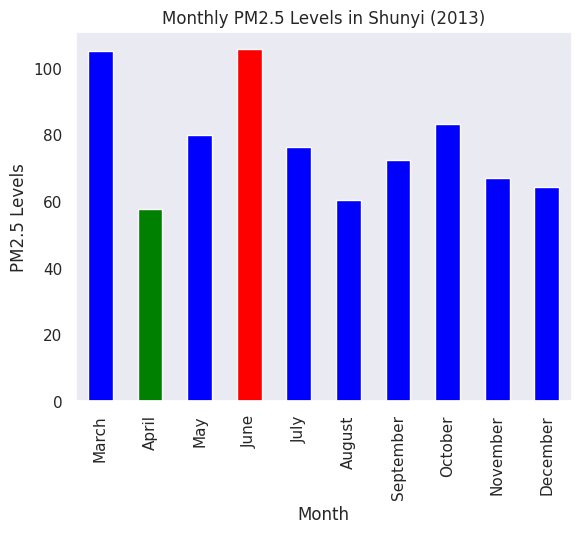

In [ ]:
fig, ax = plt.subplots()

# membuat bar chart berdasarkan data
monthly_pollution.plot(kind='bar', ax=ax, color=colors)

# menambahkan label
ax.set_xlabel("Month")
ax.set_ylabel(f"{pollutant} Levels")
ax.set_title(f"Monthly {pollutant} Levels in {city} ({year})")

In [ ]:
# rotasi label pada x-axis
ax.set_xticklabels(monthly_pollution.index, rotation=45)

[Text(0, 0, 'March'),
 Text(1, 0, 'April'),
 Text(2, 0, 'May'),
 Text(3, 0, 'June'),
 Text(4, 0, 'July'),
 Text(5, 0, 'August'),
 Text(6, 0, 'September'),
 Text(7, 0, 'October'),
 Text(8, 0, 'November'),
 Text(9, 0, 'December')]

In [ ]:
# menambahkan legend
from matplotlib.lines import Line2D

# mendefinisikan legend
legend_elements = [
        Line2D([0], [0], color='red', lw=2, label='Peak'),
        Line2D([0], [0], color='green', lw=2, label='Lowest'),
        Line2D([0], [0], color='blue', lw=2, label='Average')
    ]


In [ ]:
# menambahkan legend ke plot
ax.legend(handles=legend_elements, loc='upper right')
# menampilkan plot
st.pyplot(fig)

# menampilkan peak and lowest month and value
st.write(f"The peak of {pollutant} pollution in {city} was in {year}:")
st.write(f"Month: {peak_month}, Value: {peak_value:.2f}")
st.write(f"The Lowest of {pollutant} pollution in {city} was in {year}:")
st.write(f"Month: {lowest_month}, Value: {lowest_value:.2f}")

2024-10-02 04:30:52.601 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-02 04:30:53.086 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-02 04:30:53.092 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-02 04:30:53.096 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-02 04:30:53.098 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-02 04:30:53.101 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-02 04:30:53.104 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-02 04:30:53.106 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

### Pertanyaan 2:

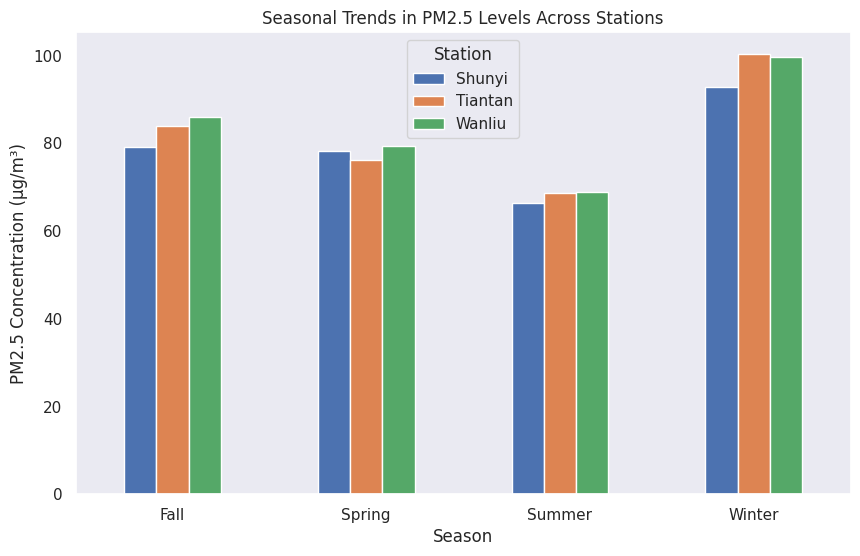

In [ ]:
# Plot seasonal trends for PM2.5 as an example
seasonal_avg_combined['PM2.5'].unstack(level=0).plot(kind='bar', figsize=(10,6))
plt.title('Seasonal Trends in PM2.5 Levels Across Stations')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.xlabel('Season')
plt.xticks(rotation=0)
plt.show()

**Insight:**
- Hasil analisis data saya menggunakan bar chart karna sangat cocok untuk perbandingan antar kategori dan cocok untuk menvisualisasikan tinggi dan rendahnya suatu nilai

## Analisis Lanjutan (Opsional)

RFM (recency,frequency,monetary)

In [ ]:
dfShunyi.loc[:, 'datetime'] = pd.to_datetime(dfShunyi[['year', 'month', 'day', 'hour']])
dfTiantan.loc[:, 'datetime'] = pd.to_datetime(dfTiantan[['year', 'month', 'day', 'hour']])
dfWanliu.loc[:, 'datetime'] = pd.to_datetime(dfWanliu[['year', 'month', 'day', 'hour']])

In [ ]:
dfShunyi.info()
dfTiantan.info()
dfWanliu.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34581 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   No        34581 non-null  int64         
 1   year      34581 non-null  int64         
 2   month     34581 non-null  int64         
 3   day       34581 non-null  int64         
 4   hour      34581 non-null  int64         
 5   PM2.5     34581 non-null  float64       
 6   PM10      34581 non-null  float64       
 7   SO2       34581 non-null  float64       
 8   NO2       34581 non-null  float64       
 9   CO        34581 non-null  float64       
 10  O3        34581 non-null  float64       
 11  TEMP      34581 non-null  float64       
 12  PRES      34581 non-null  float64       
 13  DEWP      34581 non-null  float64       
 14  RAIN      34581 non-null  float64       
 15  WSPM      34581 non-null  float64       
 16  season    34581 non-nul

In [ ]:
# Mendefinisikan kejadian polusi sebagai hari dengan PM2.5 > 100 µg/m³
pollution_threshold = 100

# Recency: Hari sejak kejadian polusi terakhir untuk setiap musim
dfShunyi['pollution_event'] = dfShunyi['PM2.5'] > pollution_threshold
last_event_shunyi = dfShunyi.groupby('season')['datetime'].max() - dfShunyi[dfShunyi['pollution_event']].groupby('season')['datetime'].max()
last_event_shunyi = last_event_shunyi.dt.days

# Frequency: Jumlah kejadian polusi per musim
freq_shunyi = dfShunyi[dfShunyi['pollution_event']].groupby('season').size()

# Monetary: Jumlah atau rata-rata nilai polutan ( menggunakan rata-rata PM2.5 di sini)
monetary_shunyi = dfShunyi.groupby('season')['PM2.5'].sum()

# Kombinasi RFM matrix
rfm_shunyi = pd.DataFrame({'Recency': last_event_shunyi, 'Frequency': freq_shunyi, 'Monetary': monetary_shunyi})
print(rfm_shunyi)

        Recency  Frequency       Monetary
season                                   
Fall          0       2392  676850.692879
Spring        0       2454  687032.870013
Summer        6       1871  582779.295845
Winter        1       2843  784497.791464


In [ ]:
# Mendefinisikan kejadian polusi sebagai hari dengan PM2.5 > 100 µg/m³
pollution_threshold = 100

# Recency: Hari sejak kejadian polusi terakhir untuk setiap musim
dfTiantan['pollution_event'] = dfTiantan['PM2.5'] > pollution_threshold
last_event_tiantan = dfTiantan.groupby('season')['datetime'].max() - dfTiantan[dfTiantan['pollution_event']].groupby('season')['datetime'].max()
last_event_tiantan = last_event_tiantan.dt.days

# Frequency: Jumlah kejadian polusi per musim
freq_tiantan = dfTiantan[dfTiantan['pollution_event']].groupby('season').size()

# Monetary: Jumlah atau rata-rata nilai polutan ( menggunakan rata-rata PM2.5 di sini)
monetary_tiantan = dfTiantan.groupby('season')['PM2.5'].sum()

# Kombinasi RFM matrix
rfm_tiantan = pd.DataFrame({'Recency': last_event_tiantan, 'Frequency': freq_tiantan, 'Monetary': monetary_tiantan})
print(rfm_tiantan)

        Recency  Frequency       Monetary
season                                   
Fall          0       2664  731011.284072
Spring        1       2289  671820.608564
Summer        6       1973  605901.527918
Winter        1       3164  865248.024300


In [ ]:
# Mendefinisikan kejadian polusi sebagai hari dengan PM2.5 > 100 µg/m³
pollution_threshold = 100

# Recency: Hari sejak kejadian polusi terakhir untuk setiap musim
dfWanliu['pollution_event'] = dfWanliu['PM2.5'] > pollution_threshold
last_event_wanliu = dfWanliu.groupby('season')['datetime'].max() - dfWanliu[dfWanliu['pollution_event']].groupby('season')['datetime'].max()
last_event_wanliu = last_event_wanliu.dt.days

# Frequency: Jumlah kejadian polusi per musim
freq_wanliu = dfWanliu[dfWanliu['pollution_event']].groupby('season').size()

# Monetary: Jumlah atau rata-rata nilai polutan ( menggunakan rata-rata PM2.5 di sini)
monetary_wanliu = dfWanliu.groupby('season')['PM2.5'].sum()

# Kombinasi RFM matrix
rfm_wanliu = pd.DataFrame({'Recency': last_event_wanliu, 'Frequency': freq_wanliu, 'Monetary': monetary_wanliu})
print(rfm_wanliu)

        Recency  Frequency       Monetary
season                                   
Fall          0       2680  745165.493475
Spring        0       2461  701517.544043
Summer        7       1980  606878.179551
Winter        6       3295  859336.824439


In [ ]:
#membuat fungsi untuk mempercepat pembuatan RFM
def calculate_rfm(df, pollution_threshold=100, pollutant_column='PM2.5'):
    # Define pollution event as days where PM2.5 > pollution_threshold
    df['pollution_event'] = df[pollutant_column] > pollution_threshold

    # Recency: Days since the last pollution event for each season
    last_event = df.groupby('season')['datetime'].max() - df[df['pollution_event']].groupby('season')['datetime'].max()
    last_event = last_event.dt.days  # Convert to number of days

    # Frequency: Number of pollution events per season
    freq = df[df['pollution_event']].groupby('season').size()

    # Monetary: Sum of the pollutant values (or you can use mean) - using PM2.5 as an example
    monetary = df.groupby('season')[pollutant_column].sum()

    # Combine Recency, Frequency, and Monetary into an RFM matrix
    rfm = pd.DataFrame({
        'Recency': last_event,
        'Frequency': freq,
        'Monetary': monetary
    })

    return rfm

# Example usage for Shunyi, Tiantan, and Wanliu
rfm_shunyi = calculate_rfm(dfShunyi)
rfm_tiantan = calculate_rfm(dfTiantan)
rfm_wanliu = calculate_rfm(dfWanliu)

# Print the results for each city
print("RFM for Shunyi:\n", rfm_shunyi)
print("RFM for Tiantan:\n", rfm_tiantan)
print("RFM for Wanliu:\n", rfm_wanliu)


RFM for Shunyi:
         Recency  Frequency       Monetary
season                                   
Fall          0       2392  676850.692879
Spring        0       2454  687032.870013
Summer        6       1871  582779.295845
Winter        1       2843  784497.791464
RFM for Tiantan:
         Recency  Frequency       Monetary
season                                   
Fall          0       2664  731011.284072
Spring        1       2289  671820.608564
Summer        6       1973  605901.527918
Winter        1       3164  865248.024300
RFM for Wanliu:
         Recency  Frequency       Monetary
season                                   
Fall          0       2680  745165.493475
Spring        0       2461  701517.544043
Summer        7       1980  606878.179551
Winter        6       3295  859336.824439


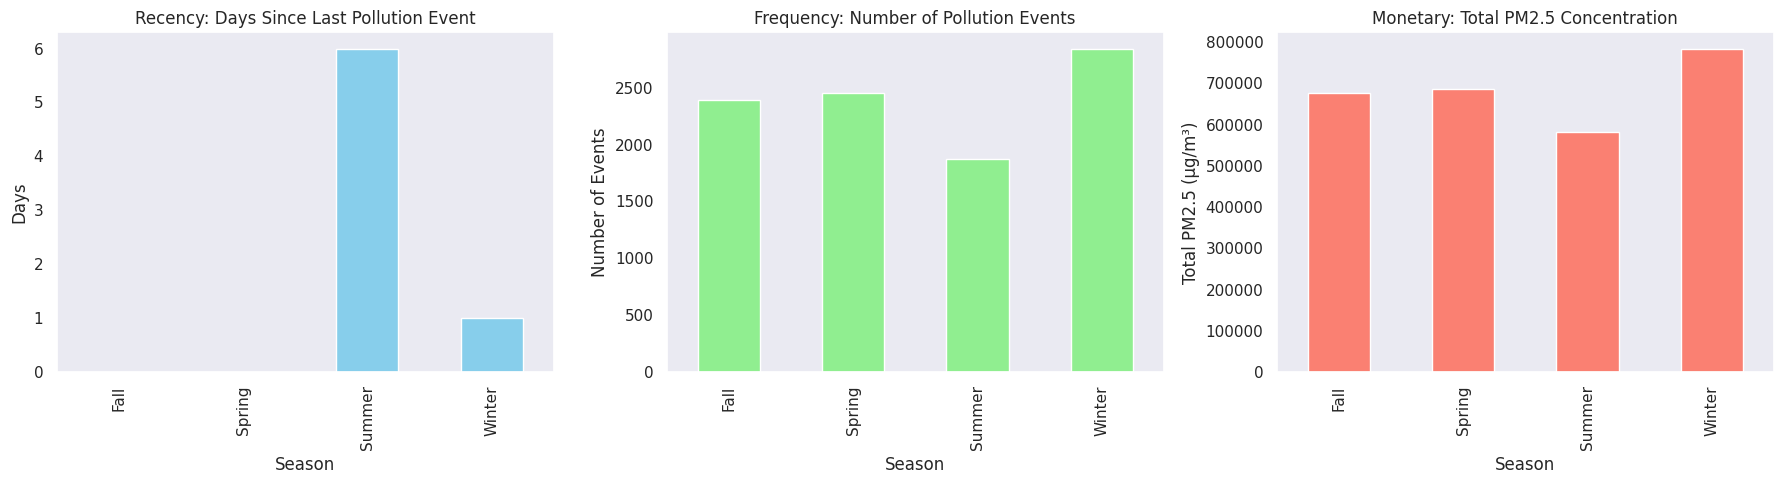

In [ ]:
# Bar charts for RFM Analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Recency Bar Chart
rfm_shunyi['Recency'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Recency: Days Since Last Pollution Event')
axes[0].set_ylabel('Days')
axes[0].set_xlabel('Season')

# Frequency Bar Chart
rfm_shunyi['Frequency'].plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Frequency: Number of Pollution Events')
axes[1].set_ylabel('Number of Events')
axes[1].set_xlabel('Season')

# Monetary Bar Chart
rfm_shunyi['Monetary'].plot(kind='bar', ax=axes[2], color='salmon')
axes[2].set_title('Monetary: Total PM2.5 Concentration')
axes[2].set_ylabel('Total PM2.5 (µg/m³)')
axes[2].set_xlabel('Season')

plt.tight_layout()
plt.show()

Clusterring

In [ ]:
# menentukan bins untuk Recency, Frequency, and Monetary
recency_bins = [0, 30, 90, 180]  # Days since last pollution event
frequency_bins = [0, 5, 15, 30]  # Number of pollution events per season
monetary_bins = [0, 500, 1000, 2000]  # PM2.5 sum

# menggunakan bins
rfm_shunyi['RecencyCluster'] = pd.cut(rfm_shunyi['Recency'], bins=recency_bins, labels=['Very Recent', 'Recent', 'Distant'])
rfm_shunyi['FrequencyCluster'] = pd.cut(rfm_shunyi['Frequency'], bins=frequency_bins, labels=['Low', 'Medium', 'High'])
rfm_shunyi['MonetaryCluster'] = pd.cut(rfm_shunyi['Monetary'], bins=monetary_bins, labels=['Low', 'Medium', 'High'])

rfm_tiantan['RecencyCluster'] = pd.cut(rfm_tiantan['Recency'], bins=recency_bins, labels=['Very Recent', 'Recent', 'Distant'])
rfm_tiantan['FrequencyCluster'] = pd.cut(rfm_tiantan['Frequency'], bins=frequency_bins, labels=['Low', 'Medium', 'High'])
rfm_tiantan['MonetaryCluster'] = pd.cut(rfm_tiantan['Monetary'], bins=monetary_bins, labels=['Low', 'Medium', 'High'])

rfm_wanliu['RecencyCluster'] = pd.cut(rfm_wanliu['Recency'], bins=recency_bins, labels=['Very Recent', 'Recent', 'Distant'])
rfm_wanliu['FrequencyCluster'] = pd.cut(rfm_wanliu['Frequency'], bins=frequency_bins, labels=['Low', 'Medium', 'High'])
rfm_wanliu['MonetaryCluster'] = pd.cut(rfm_wanliu['Monetary'], bins=monetary_bins, labels=['Low', 'Medium', 'High'])

# Print the clustering result
print(rfm_shunyi)
print(rfm_tiantan)
print(rfm_wanliu)

        Recency  Frequency       Monetary RecencyCluster FrequencyCluster  \
season                                                                      
Fall          0       2392  676850.692879            NaN              NaN   
Spring        0       2454  687032.870013            NaN              NaN   
Summer        6       1871  582779.295845    Very Recent              NaN   
Winter        1       2843  784497.791464    Very Recent              NaN   

       MonetaryCluster  
season                  
Fall               NaN  
Spring             NaN  
Summer             NaN  
Winter             NaN  
        Recency  Frequency       Monetary RecencyCluster FrequencyCluster  \
season                                                                      
Fall          0       2664  731011.284072            NaN              NaN   
Spring        1       2289  671820.608564    Very Recent              NaN   
Summer        6       1973  605901.527918    Very Recent              NaN   
Wi

In [ ]:
print(rfm_shunyi.isnull().sum())

Recency             0
Frequency           0
Monetary            0
RecencyCluster      2
FrequencyCluster    4
MonetaryCluster     4
dtype: int64


In [ ]:
# Add 'Unknown' as a valid category
rfm_shunyi['RecencyCluster'] = rfm_shunyi['RecencyCluster'].cat.add_categories('Unknown')
rfm_shunyi['FrequencyCluster'] = rfm_shunyi['FrequencyCluster'].cat.add_categories('Unknown')
rfm_shunyi['MonetaryCluster'] = rfm_shunyi['MonetaryCluster'].cat.add_categories('Unknown')

# Now fill missing values with 'Unknown'
rfm_shunyi['RecencyCluster'].fillna('Unknown', inplace=True)
rfm_shunyi['FrequencyCluster'].fillna('Unknown', inplace=True)
rfm_shunyi['MonetaryCluster'].fillna('Unknown', inplace=True)

<ipython-input-67-b21843a8443d>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rfm_shunyi['RecencyCluster'].fillna('Unknown', inplace=True)
<ipython-input-67-b21843a8443d>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [ ]:
# Map the clusters to the correct colors
colors = {'Very Recent': 'red', 'Recent': 'blue', 'Distant': 'green', 'Unknown': 'gray'}

In [ ]:
def process_rfm_clusters(rfm):
    # Add 'Unknown' as a category to the clusters
    rfm['RecencyCluster'] = rfm['RecencyCluster'].cat.add_categories('Unknown')
    rfm['FrequencyCluster'] = rfm['FrequencyCluster'].cat.add_categories('Unknown')
    rfm['MonetaryCluster'] = rfm['MonetaryCluster'].cat.add_categories('Unknown')

    # Fill missing values with 'Unknown'
    rfm['RecencyCluster'].fillna('Unknown', inplace=True)
    rfm['FrequencyCluster'].fillna('Unknown', inplace=True)
    rfm['MonetaryCluster'].fillna('Unknown', inplace=True)

    return rfm

In [ ]:
def plot_rfm_scatter(rfm, city_name):
    colors = {'Very Recent': 'red', 'Recent': 'blue', 'Distant': 'green', 'Unknown': 'gray'}
    plt.figure(figsize=(10, 6))

    # Scatter plot with Recency vs Frequency using color mapping based on RecencyCluster
    plt.scatter(rfm['Recency'], rfm['Frequency'],
                c=rfm['RecencyCluster'].map(colors),
                s=rfm['Monetary'] / 10, alpha=0.6)

    plt.title(f'RFM Clustering (Recency vs Frequency) for {city_name}')
    plt.xlabel('Recency (Days Since Last Event)')
    plt.ylabel('Frequency (Number of Events)')
    st.pyplot(plt)

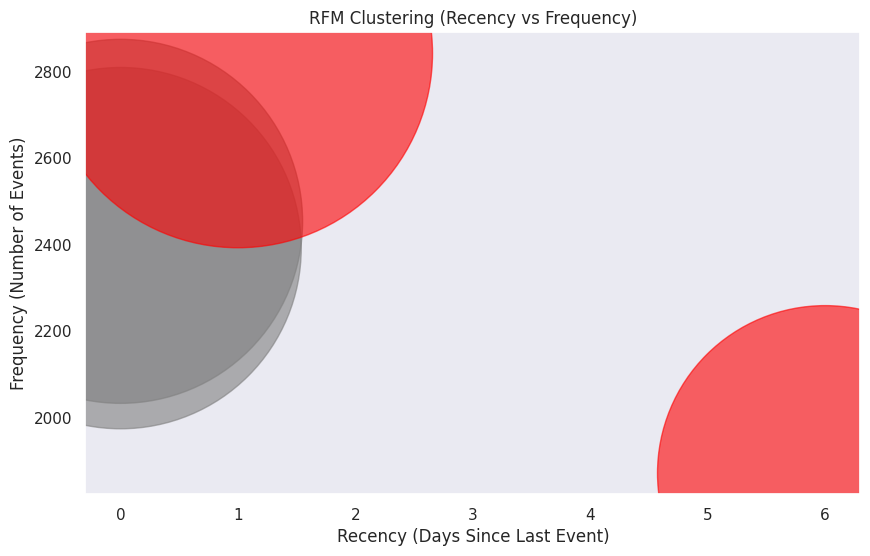

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot with Recency vs Frequency using color mapping based on RecencyCluster
plt.scatter(rfm_shunyi['Recency'], rfm_shunyi['Frequency'],
            c=rfm_shunyi['RecencyCluster'].map(colors),
            s=rfm_shunyi['Monetary'] / 10, alpha=0.6)

plt.title('RFM Clustering (Recency vs Frequency)')
plt.xlabel('Recency (Days Since Last Event)')
plt.ylabel('Frequency (Number of Events)')
plt.show()

In [ ]:
# Check unique values in RecencyCluster and FrequencyCluster
print("Recency Clusters:", rfm_shunyi['RecencyCluster'].unique())
print("Frequency Clusters:", rfm_shunyi['FrequencyCluster'].unique())


Recency Clusters: ['Unknown', 'Very Recent']
Categories (4, object): ['Very Recent' < 'Recent' < 'Distant' < 'Unknown']
Frequency Clusters: ['Unknown']
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Unknown']


In [ ]:
# Check the first few rows of rfm_shunyi to ensure data is present
print(rfm_shunyi.head())
print("Shape of rfm_shunyi:", rfm_shunyi.shape)

        Recency  Frequency       Monetary RecencyCluster FrequencyCluster  \
season                                                                      
Fall          0       2392  676850.692879        Unknown          Unknown   
Spring        0       2454  687032.870013        Unknown          Unknown   
Summer        6       1871  582779.295845    Very Recent          Unknown   
Winter        1       2843  784497.791464    Very Recent          Unknown   

       MonetaryCluster  
season                  
Fall           Unknown  
Spring         Unknown  
Summer         Unknown  
Winter         Unknown  
Shape of rfm_shunyi: (4, 6)


In [ ]:
# Re-create the pivot table for the heatmap
rfm_pivot = rfm_shunyi.pivot_table(values='Monetary',
                                     index='RecencyCluster',
                                     columns='FrequencyCluster',
                                     aggfunc='mean')

# Check the pivot table before plotting
print("Pivot Table:\n", rfm_pivot)

Pivot Table:
 FrequencyCluster        Unknown
RecencyCluster                 
Very Recent       683638.543655
Unknown           681941.781446


<ipython-input-74-e0fa2d301c6e>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  rfm_pivot = rfm_shunyi.pivot_table(values='Monetary',


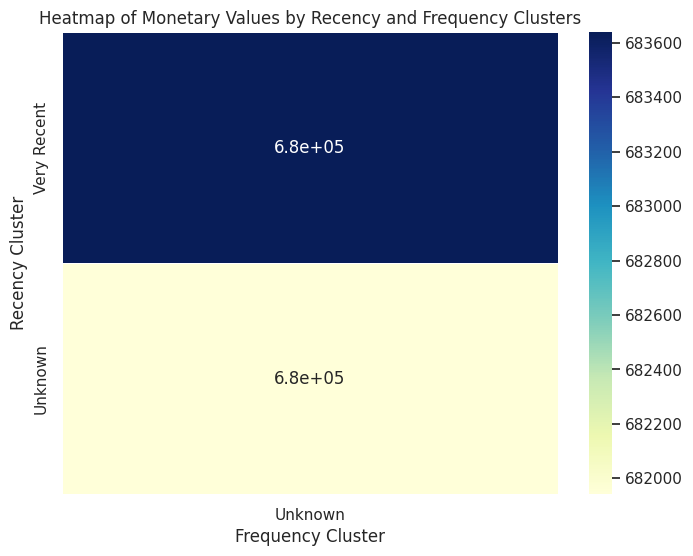

In [ ]:
# Heatmap for clustering if the pivot table is not empty
if not rfm_pivot.empty:
    plt.figure(figsize=(8, 6))
    sns.heatmap(rfm_pivot, annot=True, cmap="YlGnBu", linewidths=0.5)
    plt.title('Heatmap of Monetary Values by Recency and Frequency Clusters')
    plt.ylabel('Recency Cluster')
    plt.xlabel('Frequency Cluster')
    plt.show()
else:
    print("The pivot table is empty. Check the cluster definitions and data.")

In [ ]:
dfShunyi.to_csv('ShunyiClean.csv', index=False)
# Unduh CSV ke komputer lokal
from google.colab import files
files.download('ShunyiClean.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dfTiantan.to_csv('TiantanClean.csv', index=False)
# Unduh CSV ke komputer lokal
from google.colab import files
files.download('TiantanClean.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dfWanliu.to_csv('WanliuClean.csv', index=False)
# Unduh CSV ke komputer lokal
from google.colab import files
files.download('WanliuClean.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Conclusion

- Berdasarkan tahun 2013 polusi PM2.5 dikota Shunyi tertinggi berada dibulan Juni dan terendah dibulan April
- Pada polusi PM2.5 terjadi Lonjakan pada musim gugur(fall) dan yang terendah pada musim panas(summer)